<a href="https://colab.research.google.com/github/Paky29/cost-estimation-prediction/blob/main/SEERA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression

# set style graph
plt.style.use("ggplot")

# set limit for display
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
from google.colab import files
uploaded = files.upload()

seera = pd.read_csv("SEERA_cost_estimation_dataset.csv", delimiter=';', decimal=",")

Saving SEERA_cost_estimation_dataset.csv to SEERA_cost_estimation_dataset (1).csv


In [ ]:
#shit print
seera

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,Software tool experience,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,# Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,1,2015,1,1,1,16,7,13,2.00,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.89,2.59,4.56,2,3,0,2,2,2,2,1,3,6,6,8,1,"16,66666667",2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,"1,89",?,1,3,1,2,1,2,2,3,1
1,2,2016,25,5,1,2,1,2,2.00,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.89,2.90,4.56,1,3,0,2,5,2,2,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,"4,56",2,2,2,1,1,1,1,4,2,1
2,3,2008,2,5,3,2,2,3,3.00,5.0,0%,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.89,1.00,1.89,2,2,1,4,1,1,2,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,"1,44",3,2,2,2,4,4,3,5,2,3
3,4,2009,42,4,2,3,2,4,6.00,6.0,-17%,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,7,4,1,3,3.25,2,5.00,2.51,1.00,1,1,1,4,1,1,4,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,"1,44",1,1,3,4,4,2,4,3,4,2
4,5,2016,42,4,2,3,2,4,12.00,24.0,-17%,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.89,4.65,1.00,1,2,1,4,2,1,4,4,3,9,9,8,1,"44,44444444",2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,4,4,3,3,4,2
5,6,2012,42,4,2,3,2,4,6.00,8.0,0%,4,7,177,5,76.0,7392,9856.0,3,4,2,1,2,3,3,2,4,0,2,1.75,3,4.56,4.41,1.00,1,3,1,4,1,1,4,4,3,7,7,8,1,"14,28571429",1,2,1,1,4,2,1,4,3,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,4,4,3,3,4,2
6,7,2016,42,4,1,3,1,4,6.00,9.0,0%,1,7,54,5,5.0,5280,7920.0,3,4,1,1,2,4,2,2,4,0,4,3.50,1,5.00,3.38,1.00,2,1,1,4,2,2,4,4,3,5,5,8,2,0,1,2,1,1,4,2,1,6,3,1,0,1,1,5,1,3,NaN,1,1,1,2,4,4,4,4,3,4,2
7,8,2018,42,4,4,3,2,4,4.00,4.0,?,1,7,71,5,50.0,4400,4400.0,3,5,2,1,2,4,2,3,4,0,3,4.00,2,1.89,2.67,1.00,2,2,0,4,1,1,4,4,3,5,5,10,1,0,1,2,1,1,4,3,3,25,3,3,0,3,NaN,2,1,3,NaN,1,1,1,3,2,4,4,4,4,4,2
8,9,2018,42,4,4,3,1,4,6.00,6.0,0%,1,3,14,5,5.0,4224,4224.0,3,5,1,1,2,3,3,2,4,0,3,2.25,2,1.89,1.71,1.89,1,1,1,3,1,1,4,4,3,4,4,8,1,0,1,2,1,1,8,2,1,2,3,1,0,3,NaN,3,1,3,NaN,"1,44",1,1,2,4,2,4,4,3,4,2
9,10,2015,3,5,2,1,1,14,12.00,45.0,0%,1,2,335,4,6.0,6468,24255.0,4,5,2,1,3,4,1,6,5,1,3,3.75,1,4.56,2.51,4.56,1,3,1,2,3,3,1,1,3,4,3,7,1,0,1,1,3,1,8,3,1,4,2,1,0,3,NaN,5,3,3,NaN,"1,44",?,4,3,4,4,1,1,2,2,2


Replace "," with "." for decimal value

In [ ]:
seera.shape
seera = seera.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
seera = seera.apply(pd.to_numeric, errors='coerce', downcast='float')


**Drop** column: "*% project gain (loss)"*

*   Why ?
*   More than 3/4 of the values are undefined



In [ ]:
seera = seera.drop('% project gain (loss)', axis=1)


**Drop** column: "*Estimated size"*

*   Why ?
*   Meno del 7% delle righe hanno valori in corrispondenza di quella colonna


In [ ]:
seera = seera.drop('Estimated size', axis=1)

**Drop** rows with **Object points** = *'?'*

In [ ]:
# converts values in the "Object points" column to numbers and converts non-numeric values to NaN
seera['Object points'] = pd.to_numeric(seera['Object points'], errors='coerce')

# drop Nan rowws
seera = seera.dropna(subset=['Object points'])

In [ ]:
# description of the dataset (min, max, mean, median (50%), st dev)
seera.describe()

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,Development type,Application domain,Object points,Other sizing method,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,Software tool experience,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,# Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,116.000000,117.000000,117.000000,116.000000,117.000000,118.000000,118.000000,117.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,117.000000,118.000000,118.000000,118.000000,107.000000,118.000000,118.00000,116.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,10.000000,117.000000,118.000000,118.000000,21.000000,115.000000,115.000000,118.000000,117.000000,118.000000,118.000000,118.000000,116.000000,118.000000,117.000000,117.000000
mean,60.838982,2012.000000,17.237288,4.525424,1.974576,7.872881,4.406780,7.940678,5.538136,10.042373,1.525424,4.347457,203.474579,2.254237,5211.389648,8876.673828,4.364407,3.491525,1.940678,1.422414,2.145299,5.632479,2.301724,4.102564,3.669492,0.627119,4.282051,2.614407,1.576271,3.140932,2.629407,2.559491,1.398305,2.466102,0.703390,2.618644,2.237288,2.042373,1.788136,1.737288,2.658120,5.771186,4.305085,8.254237,1.682243,11.546099,2.90678,2.698276,1.754237,1.228814,6.779661,2.279661,1.177966,7.389831,2.525424,1.228814,0.338983,2.855932,1.900000,3.717949,2.432203,2.805085,4.904762,2.114522,1.817391,2.474576,2.418803,2.779661,2.567797,1.644068,2.077586,2.516949,2.495727,1.547009
std,34.768581,6.214128,13.205592,1.331485,1.065880,6.236845,4.155601,4.781182,3.522156,8.562634,0.993241,2.340199,250.811356,0.818446,6928.680176,12456.433594,1.625992,1.115131,1.249221,0.699700,1.268076,1.616714,0.825884,2.130989,1.132693,0.485633,1.401023,0.767004,0.618888,1.358276,1.095657,1.378168,0.642376,0.724211,0.458711,1.061522,1.311865,1.157614,0.959449,0.946681,0.574792,6.381612,6.493268,1.612910,1.078067,20.190571,1.44404,1.014845,0.942233,0.576031,1.623206,1.286920,0.445900,4.357985,1.344262,0.618946,0.475383,0.493988,0.875595,1.237671,0.831833,0.438694,1.044259,1.193613,1.225336,1.107178,0.902480,1.346954,1.194566,0.929345,0.943176,1.060020,1.171677,0.675887
min,1.000000,1993.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,0.500000,1.000000,1.000000,7.000000,1.000000,176.000000,396.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1

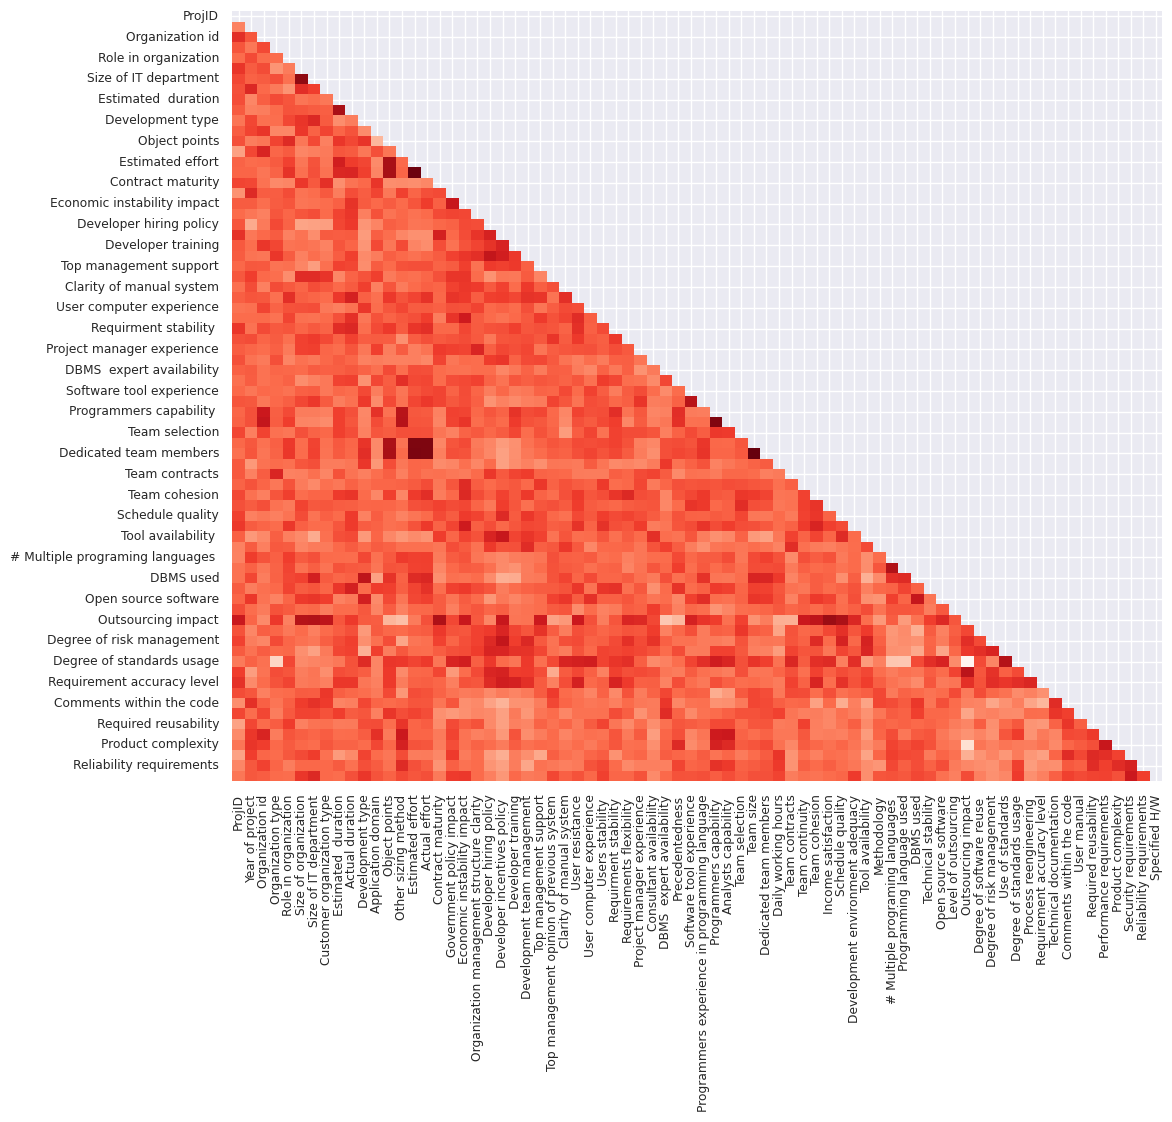

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = seera.corr()

# applying mask
mask = np.triu(np.ones_like(seera.corr()))

sns.set(font_scale=0.8)
sns.heatmap(cor, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask)
plt.show()

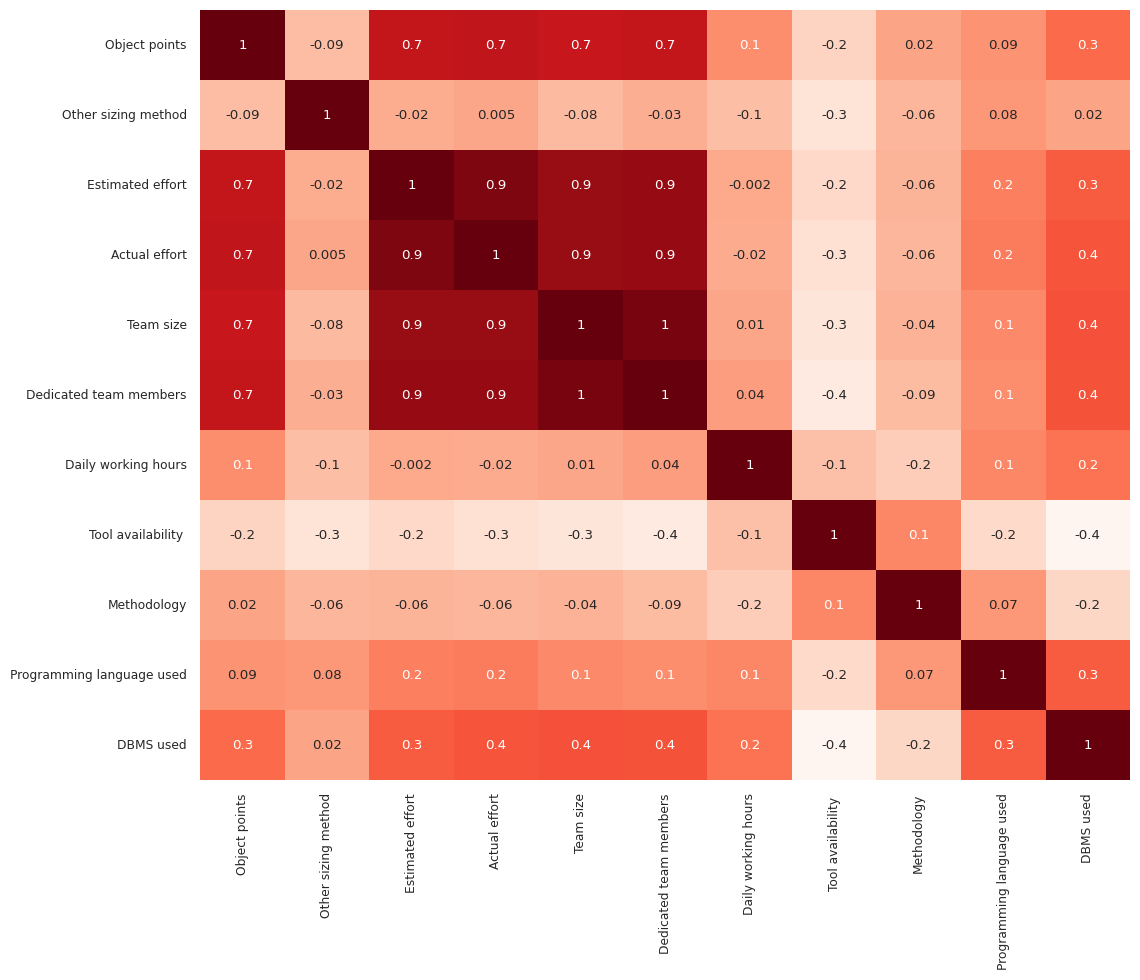

In [ ]:
#Using Pearson Correlation
features = ["Object points","Other sizing method","Estimated effort","Actual effort", "Team size", "Dedicated team members","Daily working hours", "Tool availability ", "Methodology", "Programming language used", "DBMS used"]

plt.figure(figsize=(12,10))
cor = seera[features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g')
plt.show()

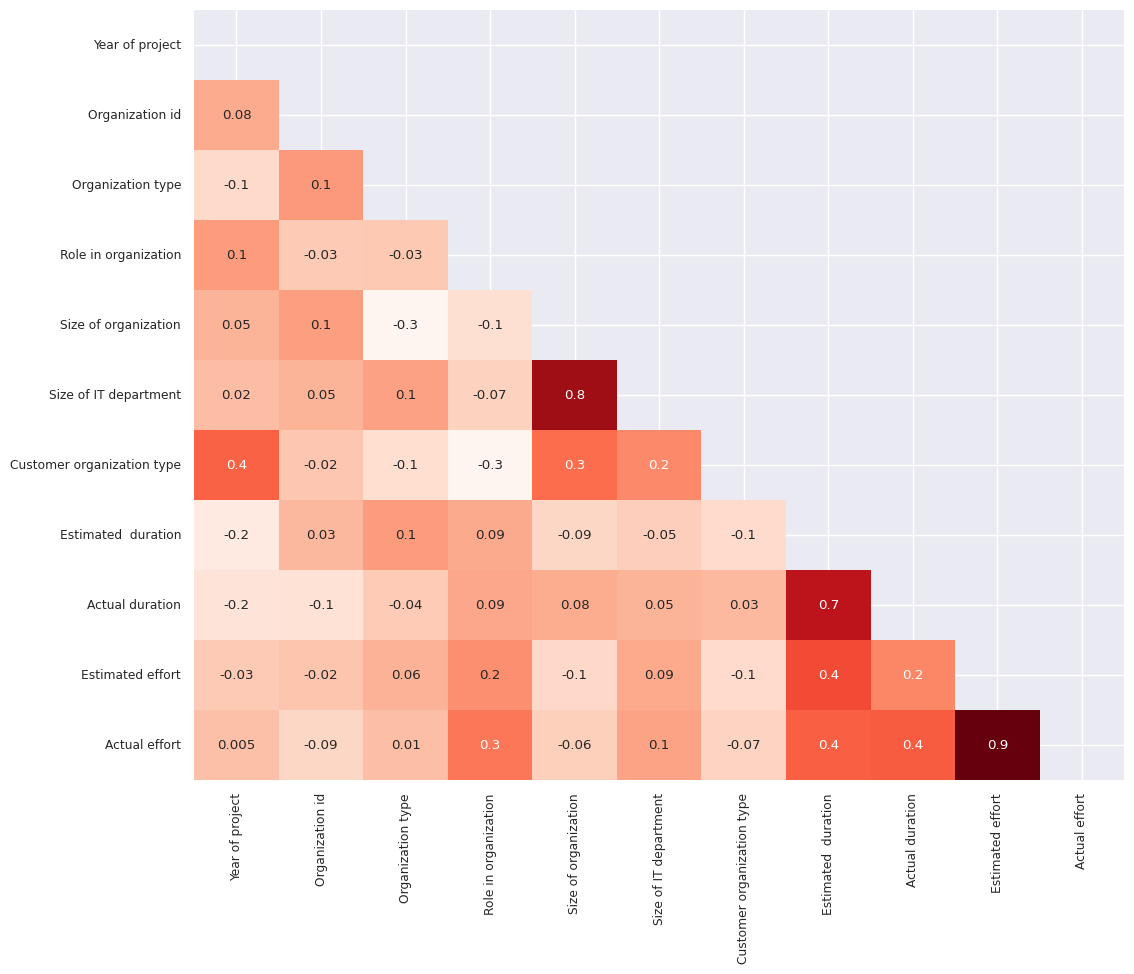

In [ ]:
#Using Pearson Correlation
gen_features = ["Year of project", "Organization id", "Organization type","Role in organization" ,"Size of organization", "Size of IT department","Customer organization type","Estimated  duration","Actual duration", "Estimated effort","Actual effort"]

# applying mask
mask_gen = np.triu(np.ones_like(seera[gen_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[gen_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_gen)
plt.show()

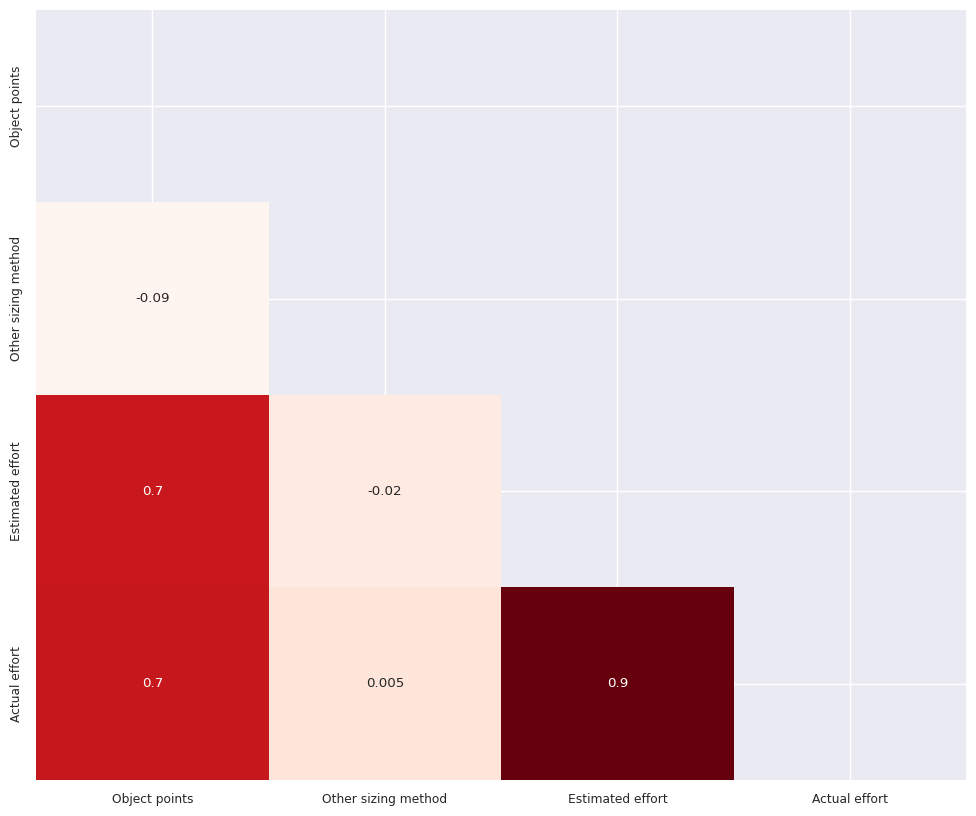

In [ ]:
size_features=["Object points","Other sizing method" , "Estimated effort","Actual effort"] 

# applying mask
mask_size = np.triu(np.ones_like(seera[size_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[size_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_size)
plt.show()

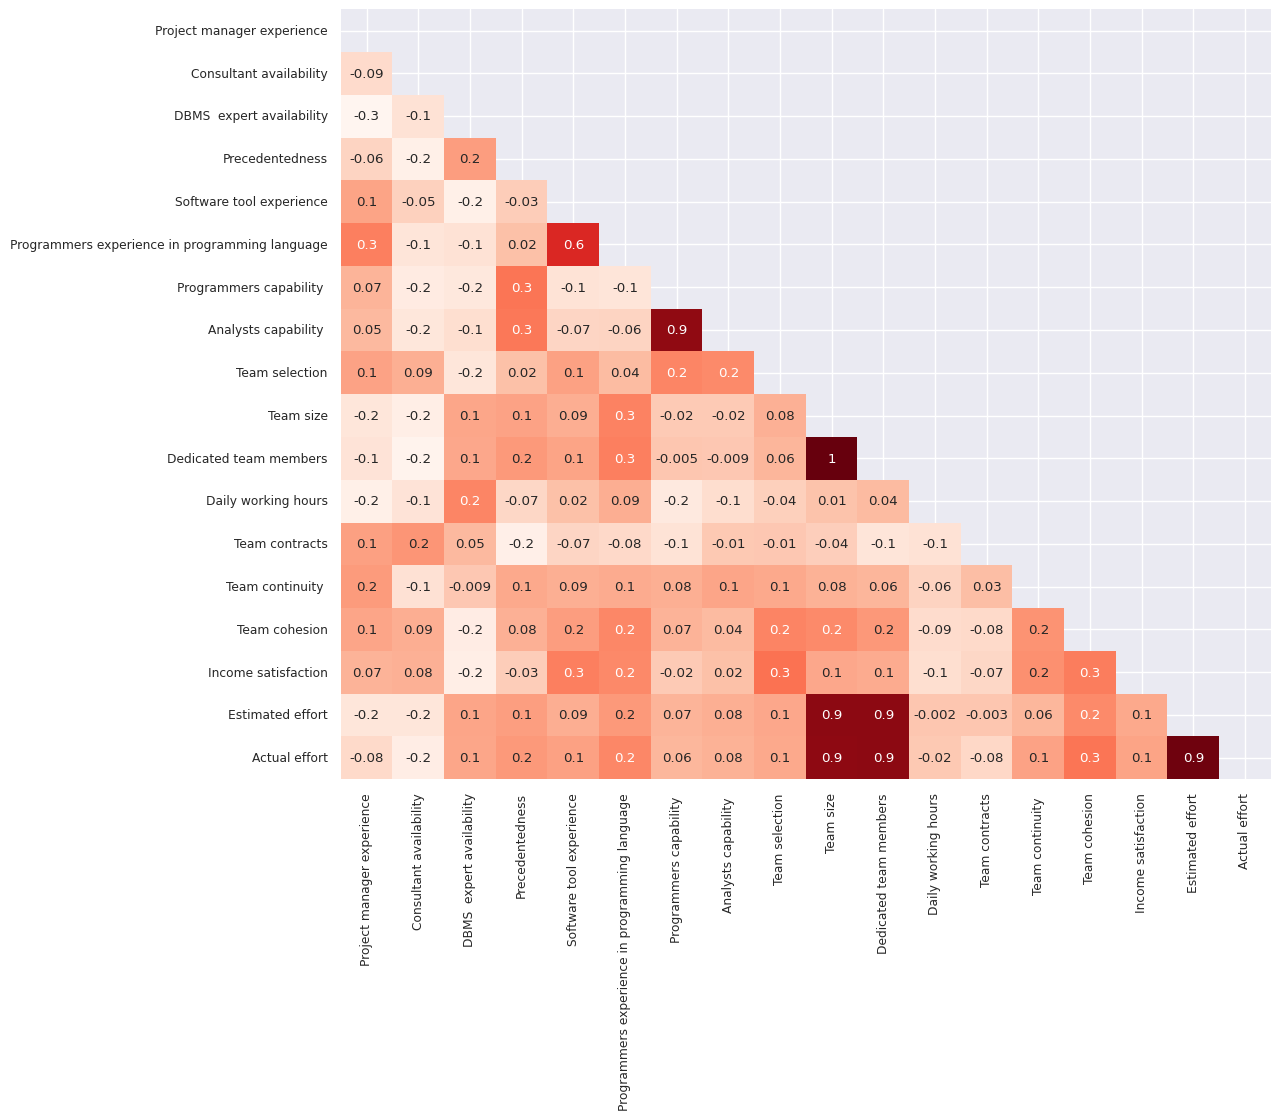

In [ ]:
develop_features = ["Project manager experience","Consultant availability","DBMS  expert availability", "Precedentedness", "Software tool experience", "Programmers experience in programming language", "Programmers capability ", "Analysts capability ", "Team selection", "Team size", "Dedicated team members", "Daily working hours", "Team contracts", "Team continuity ", "Team cohesion", "Income satisfaction","Estimated effort","Actual effort"]

# applying mask
mask_develop = np.triu(np.ones_like(seera[develop_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[develop_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_develop)
plt.show()

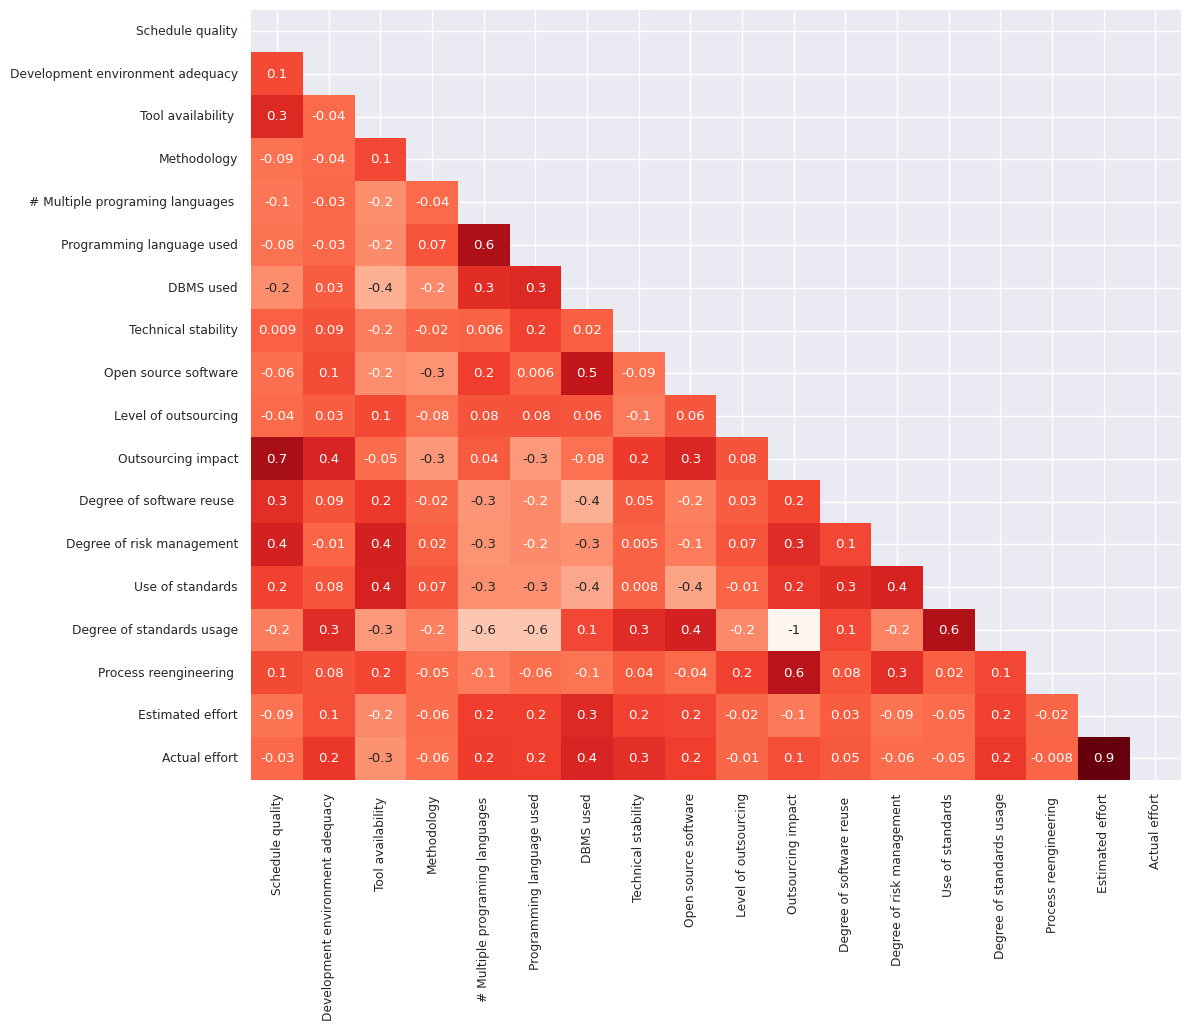

In [ ]:
project_features=[  "Schedule quality",  "Development environment adequacy",  "Tool availability ",  "Methodology",  "# Multiple programing languages ",  "Programming language used",  "DBMS used",  "Technical stability",  "Open source software",  "Level of outsourcing",  "Outsourcing impact",  "Degree of software reuse ",  "Degree of risk management",  "Use of standards",  "Degree of standards usage",  " Process reengineering ","Estimated effort","Actual effort"]

# applying mask
mask_proj = np.triu(np.ones_like(seera[project_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[project_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_proj)
plt.show()

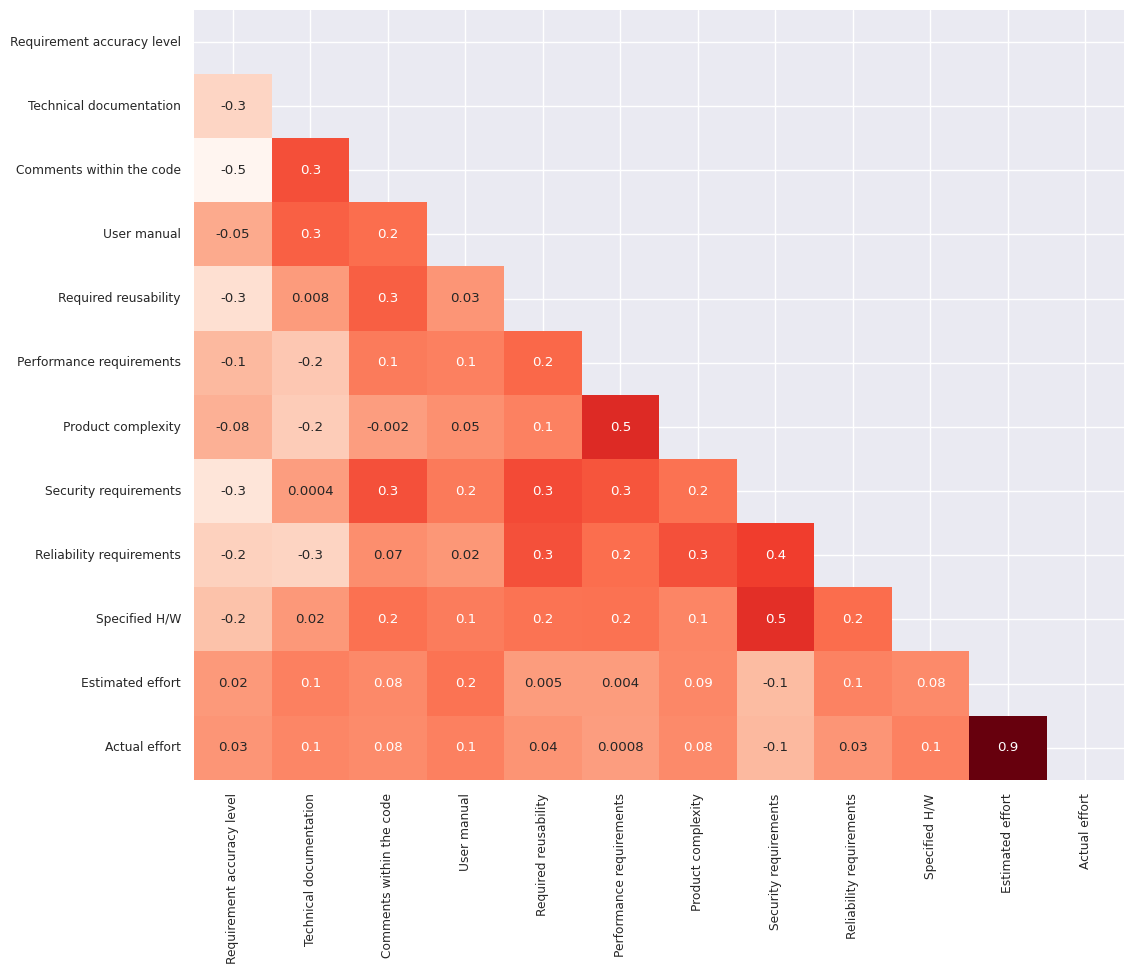

In [ ]:
prod_features = [  "Requirement accuracy level",  "Technical documentation",  "Comments within the code",  "User manual",  "Required reusability",  "Performance requirements",  "Product complexity",  "Security requirements",  "Reliability requirements",  "Specified H/W","Estimated effort","Actual effort"]

# applying mask
mask_prod = np.triu(np.ones_like(seera[prod_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[prod_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_prod)
plt.show()


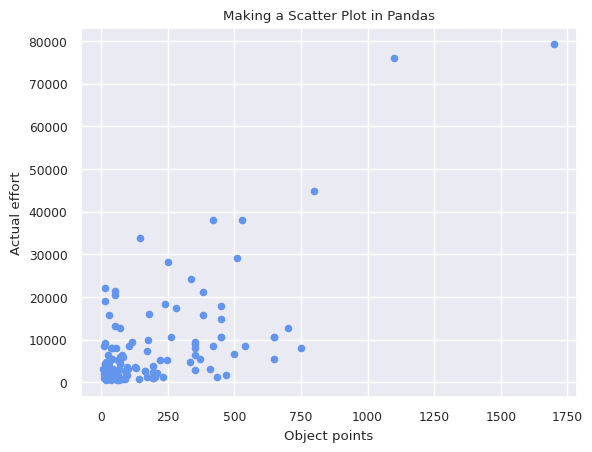

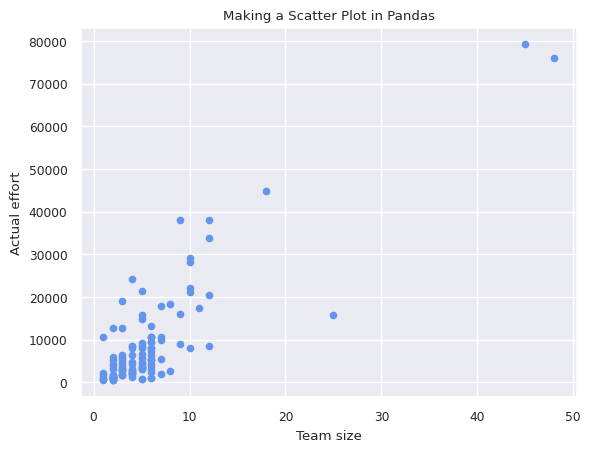

In [ ]:
seera.plot(
    x="Object points", 
    y="Actual effort", 
    kind='scatter', 
    c='cornflowerblue',
    title='Making a Scatter Plot in Pandas',
    xlabel='Object points',
    ylabel='Actual effort',
)

plt.show()

seera.plot(
    x="Team size", 
    y="Actual effort", 
    kind='scatter', 
    c='cornflowerblue',
    title='Making a Scatter Plot in Pandas',
    xlabel='Team size',
    ylabel='Actual effort',
)

plt.show()

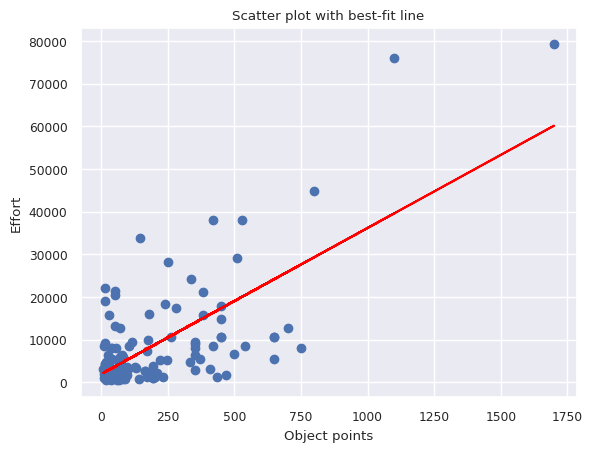

In [ ]:
# converts values in the "Object points" column to numbers and converts non-numeric values to NaN
seera['Object points'] = pd.to_numeric(seera['Object points'], errors='coerce')

# drop Nan rowws
seera = seera.dropna(subset=['Object points'])

x = seera["Object points"]
y = seera["Actual effort"]

# Create a scatter plot
plt.scatter(x, y)

# Calculate the best-fit line
fit = np.polyfit(x, y, 1)
slope = fit[0]
intercept = fit[1]

# Add the line to the scatter plot
plt.plot(x, slope*x + intercept, color='red')

# Add labels and title
plt.xlabel('Object points')
plt.ylabel('Effort')
plt.title('Scatter plot with best-fit line')

# Show the plot
plt.show()

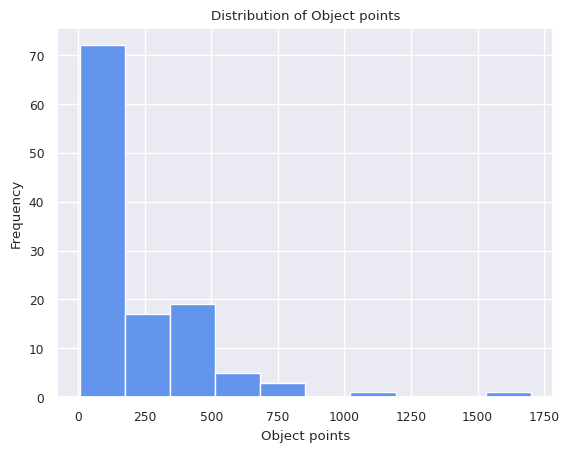

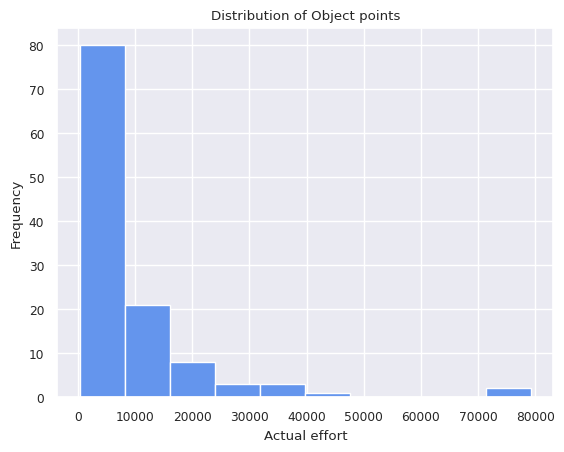

In [ ]:
# Create a histogram

data = seera['Object points']

plt.hist(data, bins=10, color='cornflowerblue')

# Add labels and title
plt.xlabel('Object points')
plt.ylabel('Frequency')
plt.title('Distribution of Object points')

# Show the plot
plt.show()

# Create a histogram

data = seera['Actual effort']

plt.hist(data, bins=10, color='cornflowerblue')

# Add labels and title
plt.xlabel('Actual effort')
plt.ylabel('Frequency')
plt.title('Distribution of Object points')

# Show the plot
plt.show()

Feature Scaling

In [ ]:
# MinMax - RobustScaler

# Seleziona le colonne che si desidera normalizzare
#columns = ['Estimated effort', 'Actual effort']

# Crea un oggetto MinMaxScaler
#scaler = MinMaxScaler()

# Applica la normalizzazione min-max alle colonne selezionate
#seera[columns] = scaler.fit_transform(seera[columns])


# Crea un oggetto RobustScaler
#scaler = RobustScaler()

# Applica la normalizzazione di robustezza alle colonne selezionate
#seera[columns] = scaler.fit_transform(seera[columns])

# Regressione lineare

# Scale the features
x = seera.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
seera = pd.DataFrame(x_scaled)

seera.describe()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,116.000000,117.000000,117.000000,116.000000,117.000000,118.000000,118.000000,117.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,117.000000,118.000000,118.000000,118.000000,107.000000,118.000000,118.000000,116.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,10.000000,117.000000,118.000000,118.000000,21.000000,115.000000,115.000000,118.000000,117.000000,118.000000,118.000000,118.000000,116.000000,118.000000,117.000000,117.000000
mean,0.502849,0.730772,0.369029,0.503632,0.139225,0.429555,0.309707,0.433792,0.267754,0.200892,0.175141,0.557910,0.116051,0.313559,0.099687,0.107617,0.480630,0.622881,0.156780,0.211207,0.381766,0.605413,0.650862,0.233618,0.667373,0.627119,0.380342,0.430508,0.288136,0.402229,0.427666,0.389873,0.199153,0.733051,0.703390,0.539548,0.309322,0.260593,0.262712,0.245763,0.829060,0.101515,0.089689,0.425424,0.170561,0.115461,0.272397,0.424569,0.251412,0.076271,0.796610,0.213277,0.088983,0.266243,0.381356,0.076271,0.338983,0.927966,0.450000,0.679487,0.716102,0.902542,0.780952,0.278630,0.272464,0.491525,0.472934,0.593220,0.391949,0.214689,0.359195,0.379237,0.498576,0.182336
std,0.292173,0.239005,0.300127,0.190212,0.152269,0.389803,0.377782,0.298824,0.178337,0.180266,0.331080,0.390033,0.148146,0.204611,0.137169,0.158069,0.232285,0.278783,0.208204,0.349850,0.422692,0.269452,0.412942,0.236777,0.283173,0.485633,0.233504,0.204534,0.309444,0.436745,0.287574,0.344542,0.321188,0.362106,0.458711,0.353841,0.327966,0.289403,0.319816,0.315560,0.287396,0.135779,0.135276,0.161291,0.269517,0.201906,0.206292,0.253711,0.314078,0.192010,0.270534,0.214487,0.222950,0.181583,0.336066,0.206315,0.475383,0.246994,0.437798,0.309418,0.415916,0.219347,0.208852,0.298403,0.408445,0.369059,0.300827,0.448984,0.298642,0.309782,0.314392,0.265005,0.390559,0.225296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254202,0.615387,0.113636,0.428571,0.000000,0.125000,0.000000,0.125000,0.139241,0.094737,0.000000,0.166667,0.017720,0.250000,0.020198,0.021776,0.428571,0.500000,0.000000,0.000000,0.000000,0.333333,0.500000,0.000000,0.750000,0.000000,0.166667,0.266667,0.000000,0.000000,0.165354,0.110000,0.000000,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.500000,0.042553,0.020833,0.400000,0.000000,0.000000,0.142857,0.250000,0.000000,0.000000,0.500000,0.000000,0.000000,0.208333,0.250000,0.000000,0.000000,1.000000,0.000000,0.500000,0.500000,1.000000,0.800000,0.110000,0.000000,0.083333,0.333333,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
50%,0.500000,0.807693,0.238636,0.571429,0.142857,0.218750,0.090909,0.562500,0.240506,0.157895,0.000000,0.666667,0.050797,0.250000,0.051829,0.053043,0.428571,0.750000,0.000000,0.000000,0.333333,0.666667,1.000000,0.111111,0.750000,1.000000,0.333333,0.400000,0.500000,0.000000,0.459318,0.222

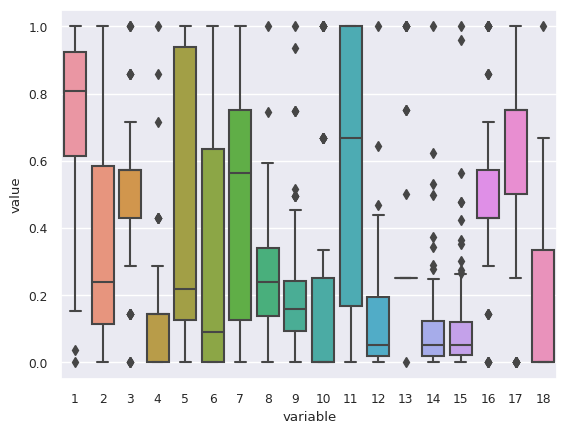

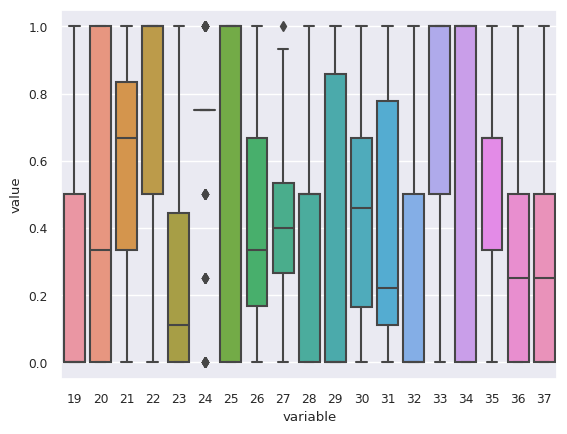

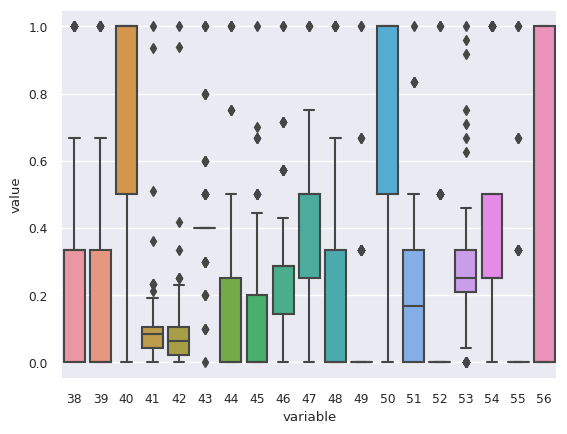

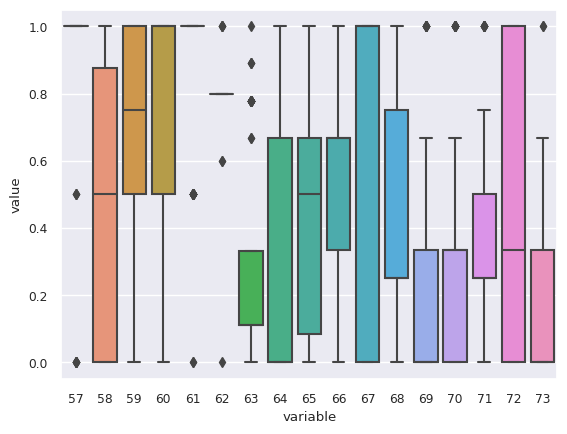

In [ ]:
sns.boxplot(x="variable", y="value", data=pd.melt(seera[range(1,19)]))
plt.show()

sns.boxplot(x="variable", y="value", data=pd.melt(seera[range(19,38)]))
plt.show()

sns.boxplot(x="variable", y="value", data=pd.melt(seera[range(38,57)]))
plt.show()

sns.boxplot(x="variable", y="value", data=pd.melt(seera[range(57,74)]))
plt.show()